## Checking simulation parameters, and the quality of simulation
- Energy and pressure plots
- Distance between periodic images


In [1]:
#Libraries and main variables initialized
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import rmsd
import numpy as np
import urllib.request, json
import os
import re
import nglview as nv
from funcs import get_files_from_git
from funcs import view_nucl
import panedr
import matplotlib.pyplot as plt

#Reloading funcs if changed
from importlib import reload 
import funcs,config
reload(funcs)
reload(config)



%matplotlib inline
from IPython.display import Markdown, display
from config import folder,descr,pname,scuser
display(Markdown(descr))
print("Folder set to: ",folder)
print("Project name: ",pname)
print("User set to:",scuser)




# MD simulations of H3-H4, tails truncated
- AMBER14SB force field
- 50 mM NaCl
- box 2nm


Folder set to:  h3-h4_tm
Project name:  h3-h4_tm
User set to: shaytan_1609


### Quick analysis 

Quick view

In [ ]:
view_nucl('GMX_system/init_solv_ions.pdb','GMX_run/7_prod.xtc')

## QC analysis
### Let's look at energy, temperature pressure
#### First 1000 steps

Last Frame read : 500001, time : 1000000.0 ps
500001 frame read in 162.82 seconds


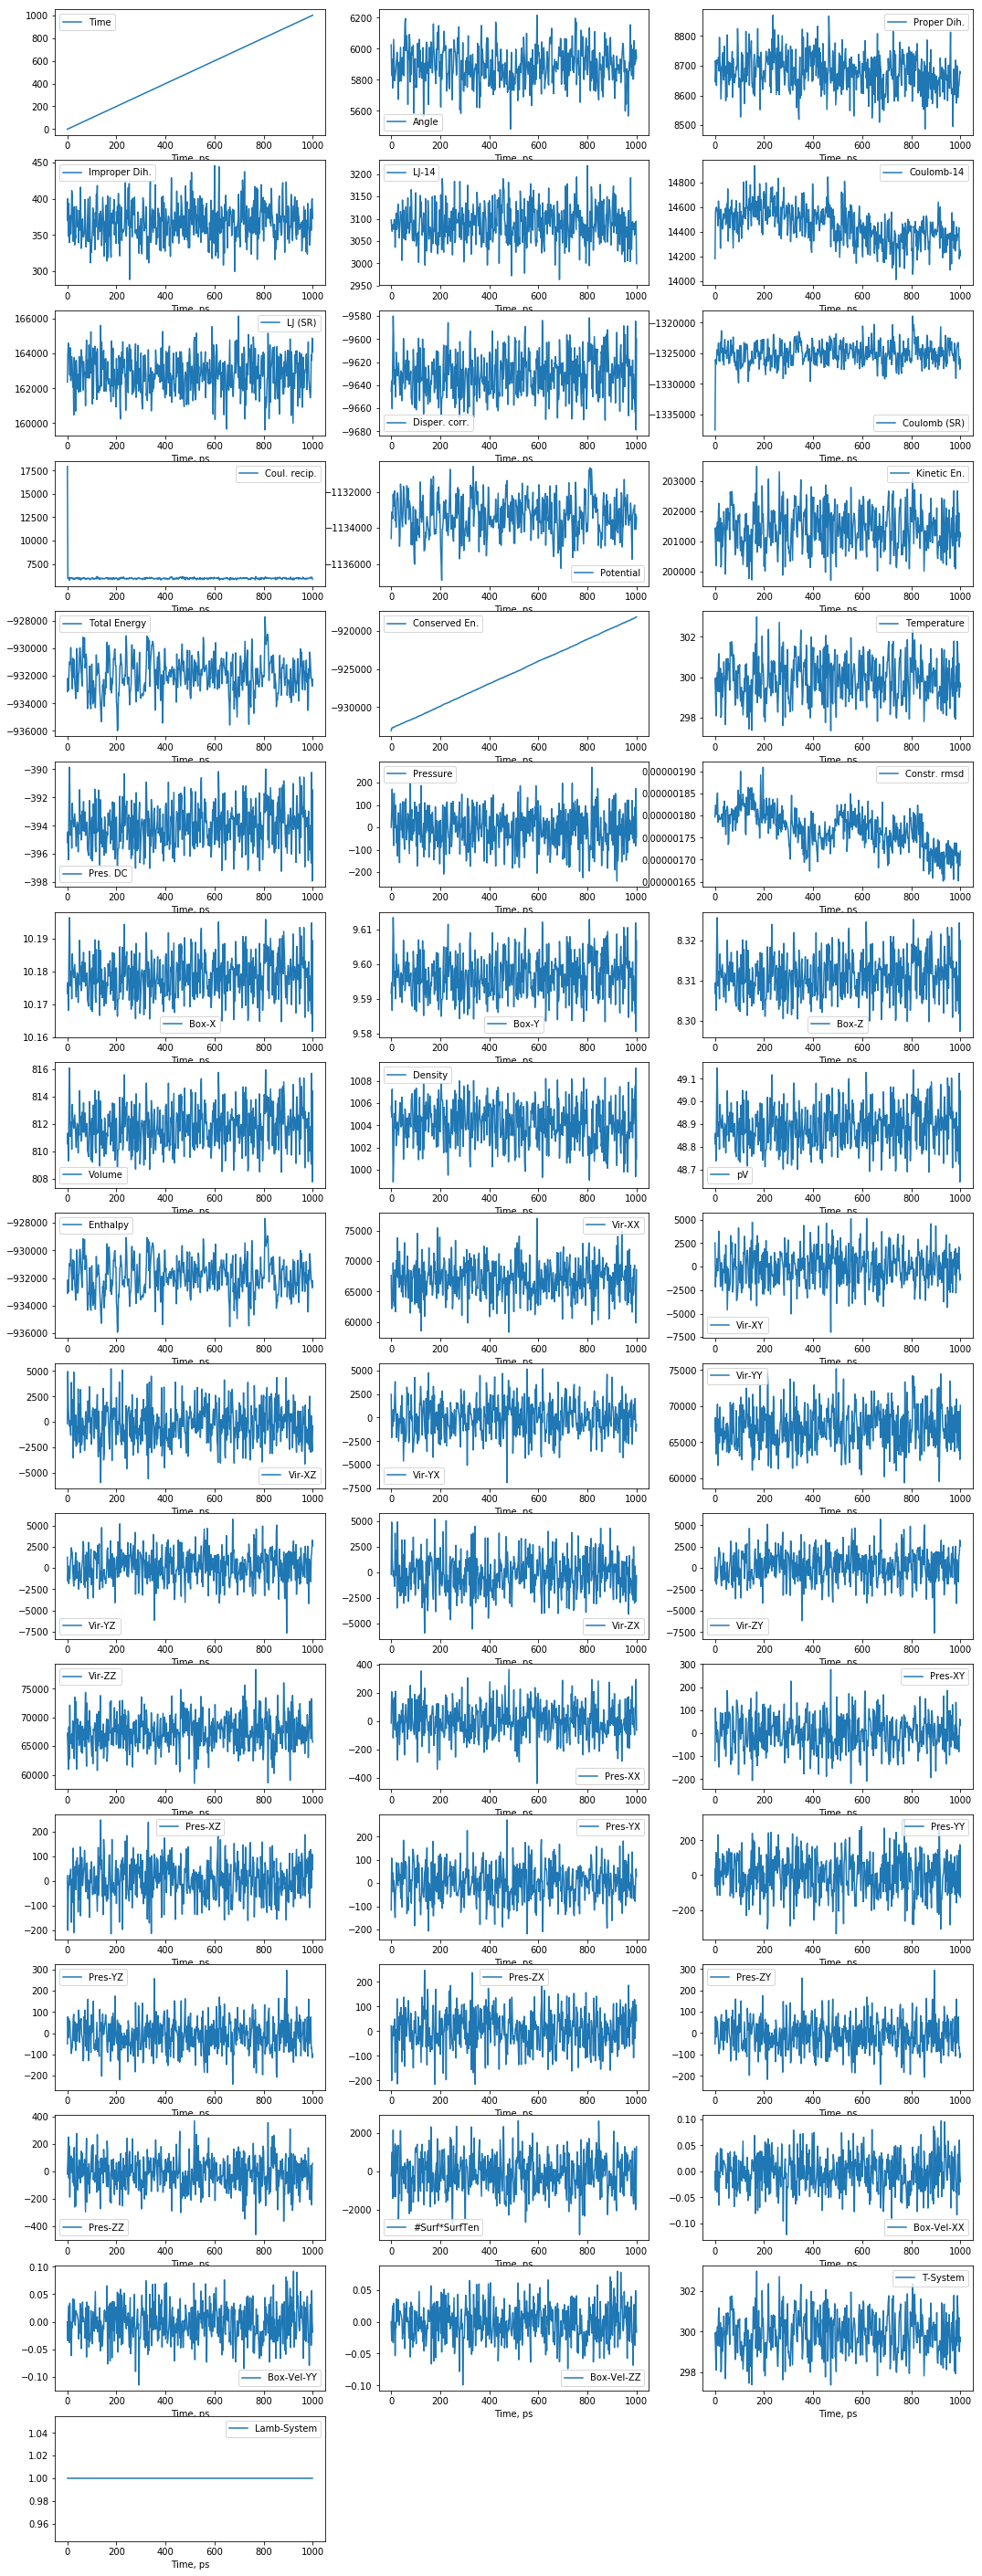

In [9]:
df = panedr.edr_to_df('GMX_run/7_prod.edr', verbose=True)
num_of_keys=len(df.keys())
grid=[1+num_of_keys//3,3]

plt.figure(figsize=(grid[1]*6,grid[0]*3))
plt.title('Mod')
for i,key in enumerate(df.keys(),1):
    ax=plt.subplot(*grid, i)
    ax.plot(df[key][0:1000],label=key)
    ax.set_xlabel('Time, ps')
    ax.legend()    
plt.show()

#### All trajectory, every 1000 step

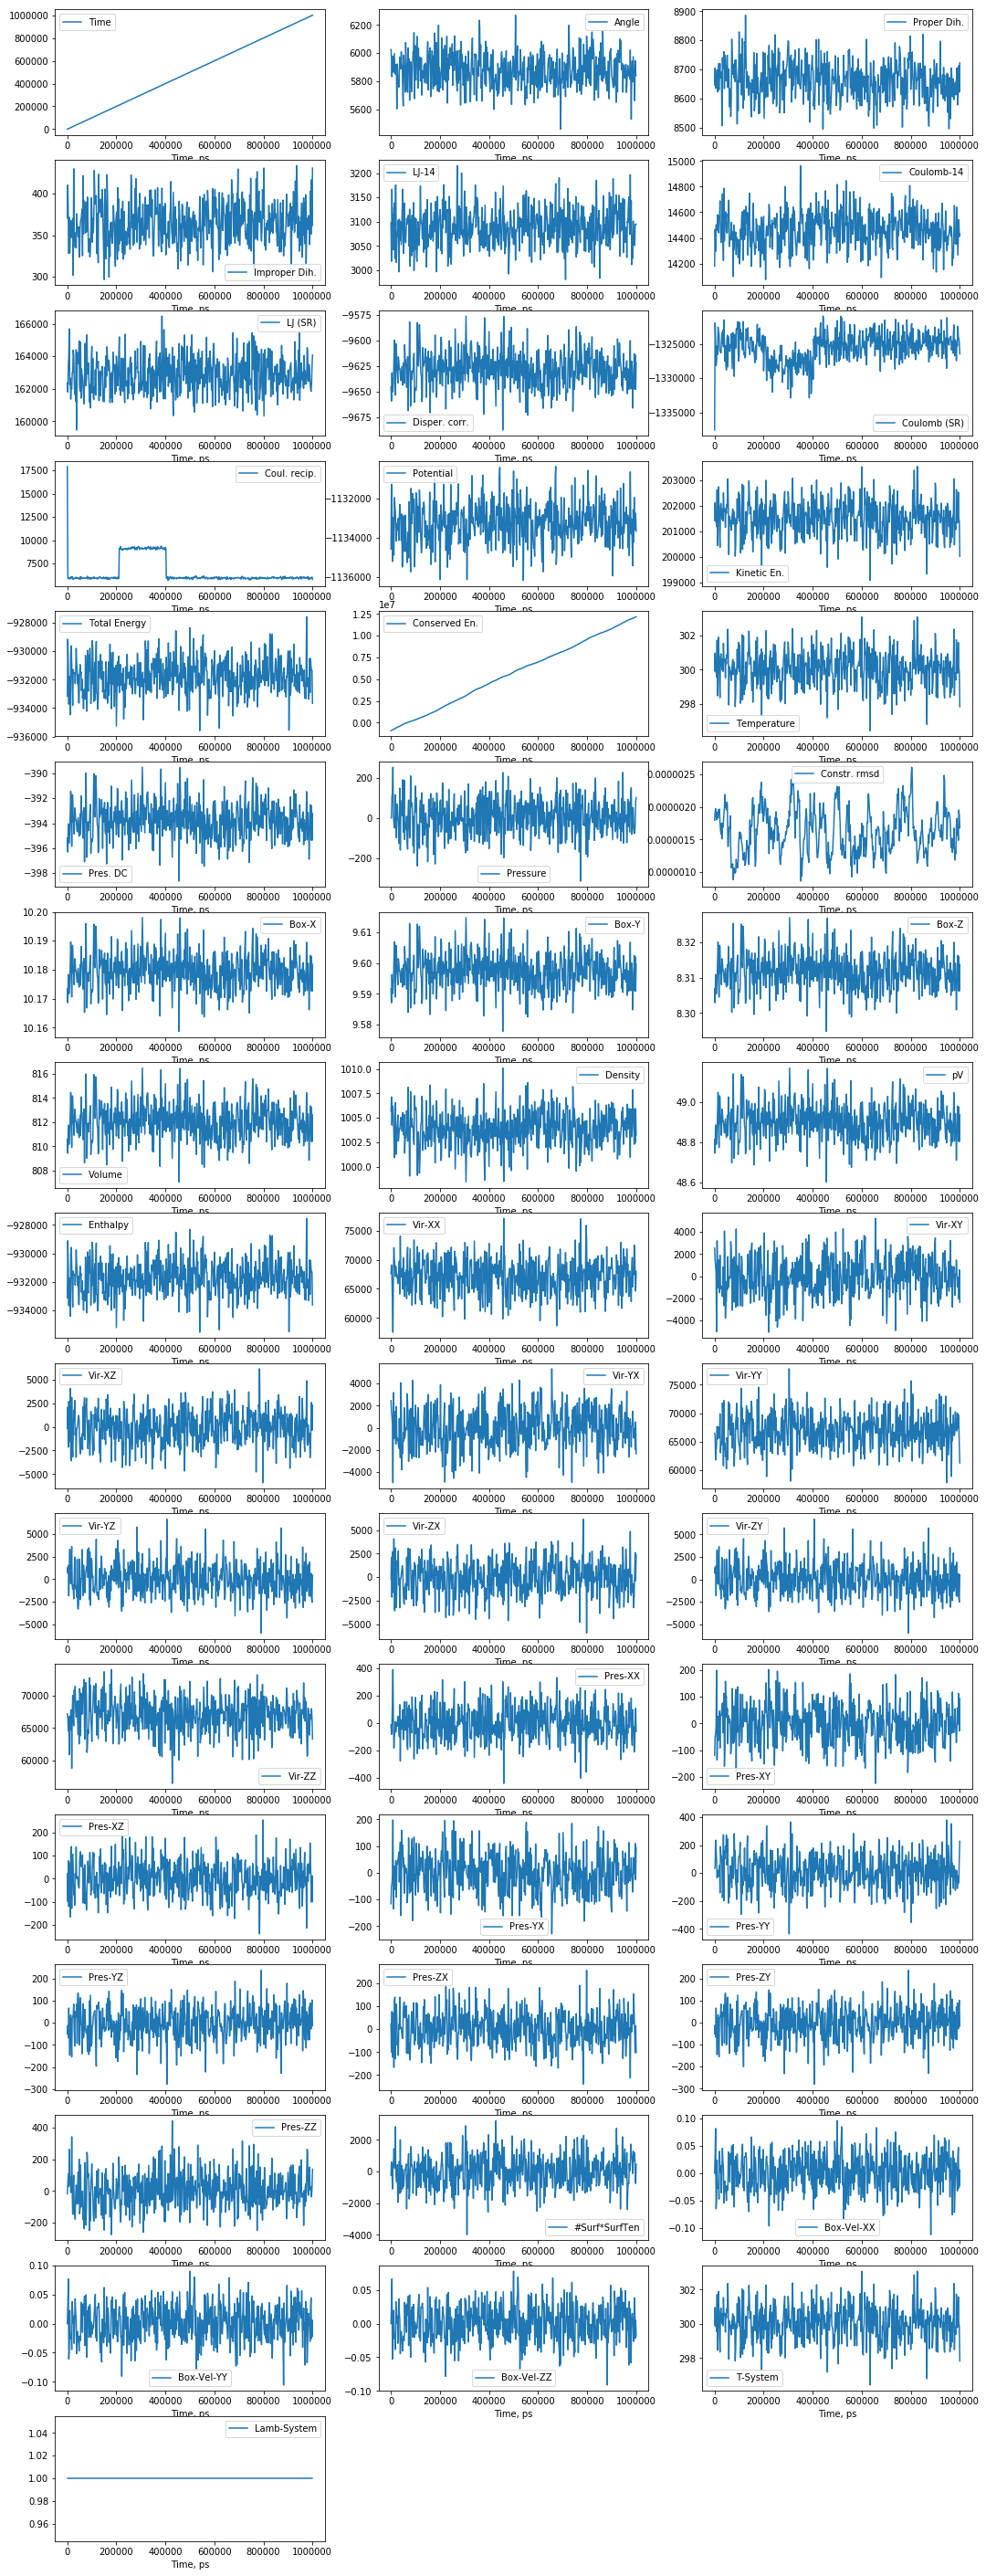

In [10]:
step=1000 #plot every 1000 records

plt.figure(figsize=(grid[1]*6,grid[0]*3))
plt.title('Mod')
for i,key in enumerate(df.keys(),1):
    ax=plt.subplot(*grid, i)
    ax.plot(df[key][0::step],label=key)
    ax.set_xlabel('Time, ps')
    ax.legend()    
plt.show()